IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

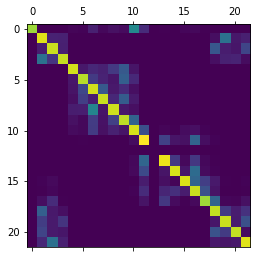

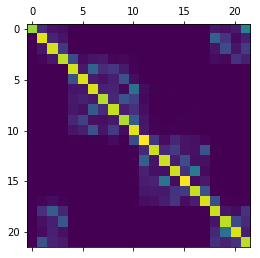

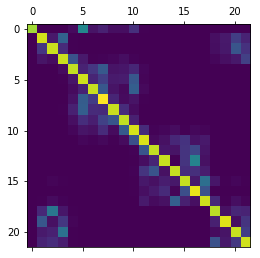

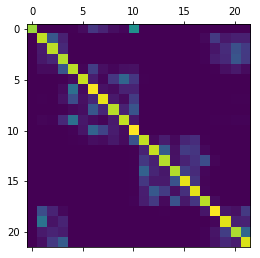

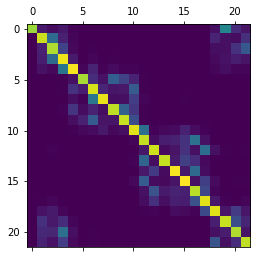

In [3]:
import pandas
import csv
import sys
sys.path.append ('/Users/Zhonghou/Desktop/UT/Preston Lab/modified_predictive_representations')
import SRclass_nathum_exp1 as SR
import matplotlib.pyplot as plt

gamma = alpha = .5

# receives a tab-separated input file and returns the data frame containing its contents
def read_file (directory):
    with open (directory) as file:
        matrix = pandas.read_csv (file, sep='\t')
    return matrix

# gets the objects column from the experimental run which is inputted
def get_objects(directory):
    matrix = read_file (directory)
    return matrix[[' objnum']]

# makes the envstep necessary for SRclass_nathum_exp1.py
def make_envstep (directory):
    envstep = []
    objects = get_objects (directory)
    for index in range (len (objects)):
        obj = objects.iat[index,0]
        if index < len (objects) - 2:
            envstep.append ([obj, False])
        else:
            envstep.append ([obj, True])
    return envstep

def main ():
    runs = []
    directory = '/Users/Zhonghou/Desktop/UT/Preston Lab/modified_predictive_representations/tesserScan_100_B/'
    for part_num in [1,2]:
        for run_num in [1,2,3,4,5]:
            filename = 'tesserScan_100_B_StructLearn_Part%s_Run_%s.txt'%(part_num, run_num)
            runs.append (directory+filename)

    for run in runs:
        envstep = make_envstep (run)
        M = SR.SRclass_nathum_exp1(envstep, gamma, alpha)
        plt.matshow (M)

main()